# Import liberies

In [4]:
%pip install imbalanced-learn
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.
     --------------------------------------- 70.9/70.9 MB 31.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, Binarizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from imblearn.pipeline import Pipeline
from sklearn.utils import class_weight

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# no pipline build yet,so I make it without pipline for now
# what we need in pipline? 

#label encoder
#encoding the dict for all the rest featutes
#features selecion

# loading the data

In [2]:
heartdf=pd.read_csv('heart_2020_cleaned.csv')
heart_for_dup=heartdf.copy()
heart_for_dup.drop_duplicates(inplace=True)

In [3]:
#label encoder
label=LabelEncoder()

features_for_encode=['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex',
                                'PhysicalActivity','Asthma','KidneyDisease','SkinCancer']

for column in features_for_encode:
    heart_for_dup[column] = label.fit_transform(heart_for_dup[column])

In [4]:
#check
heart_for_dup.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,No,1,Very good,8.0,0,0,0


In [5]:
#encoding the rest of the non-numerical features
list_col = ['AgeCategory','Race','Diabetic','GenHealth']

age_dict = {'18-24':18,'25-29':25,'30-34':30,'35-39':35,'40-44':40,'45-49':45,'50-54':50,'55-59':55,'60-64':60,
            '65-69':65,'70-74':70,'75-79':75,'80 or older':80}
race_dict = {'White':0, 'Hispanic':1, 'Black':2, 'Other':3, 'Asian':4, 'American Indian/Alaskan Native':5}
diabetic_dict = {'No':0, 'Yes':1, 'No, borderline diabetes':2, 'Yes (during pregnancy)':3}
genHealth_dict = {'Very good':0, 'Good':1, 'Excellent':2, 'Fair':3, 'Poor':4}

list_dict = [age_dict,race_dict,diabetic_dict,genHealth_dict]

In [9]:
heart_for_dup_copy=heart_for_dup.copy()

In [7]:
#for col in list_col:
#    for d in list_dict:
#        heart_for_dup_copy[col]=heart_for_dup_copy[col].map(d)

In [10]:
heart_for_dup_copy['AgeCategory']=heart_for_dup_copy['AgeCategory'].map(age_dict)
heart_for_dup_copy['Race']=heart_for_dup_copy['Race'].map(race_dict)
heart_for_dup_copy['Diabetic']=heart_for_dup_copy['Diabetic'].map(diabetic_dict)
heart_for_dup_copy['GenHealth']=heart_for_dup_copy['GenHealth'].map(genHealth_dict)

In [11]:
heart_for_dup_copy.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55,0,1,1,0,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,0,0,1,0,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65,0,1,1,3,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75,0,0,0,1,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40,0,0,1,0,8.0,0,0,0


# corraltion matrix - again

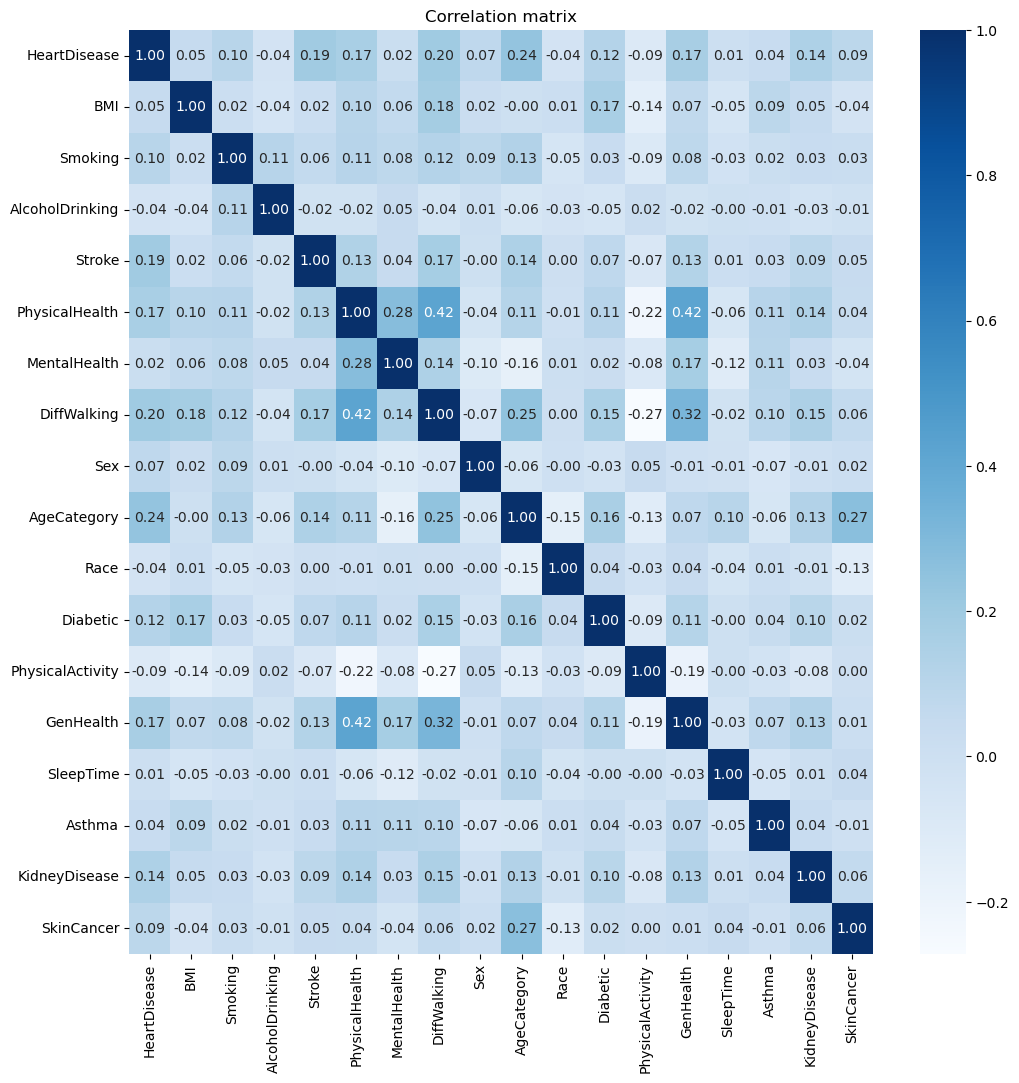

In [15]:
#corraltion matrix - again

plt.figure(figsize=(12,12))
sns.heatmap(heart_for_dup_copy.corr(),cbar=True,annot=True,cmap='Blues',fmt=".2f")
plt.title('Correlation matrix')
plt.show()

KeyboardInterrupt: 

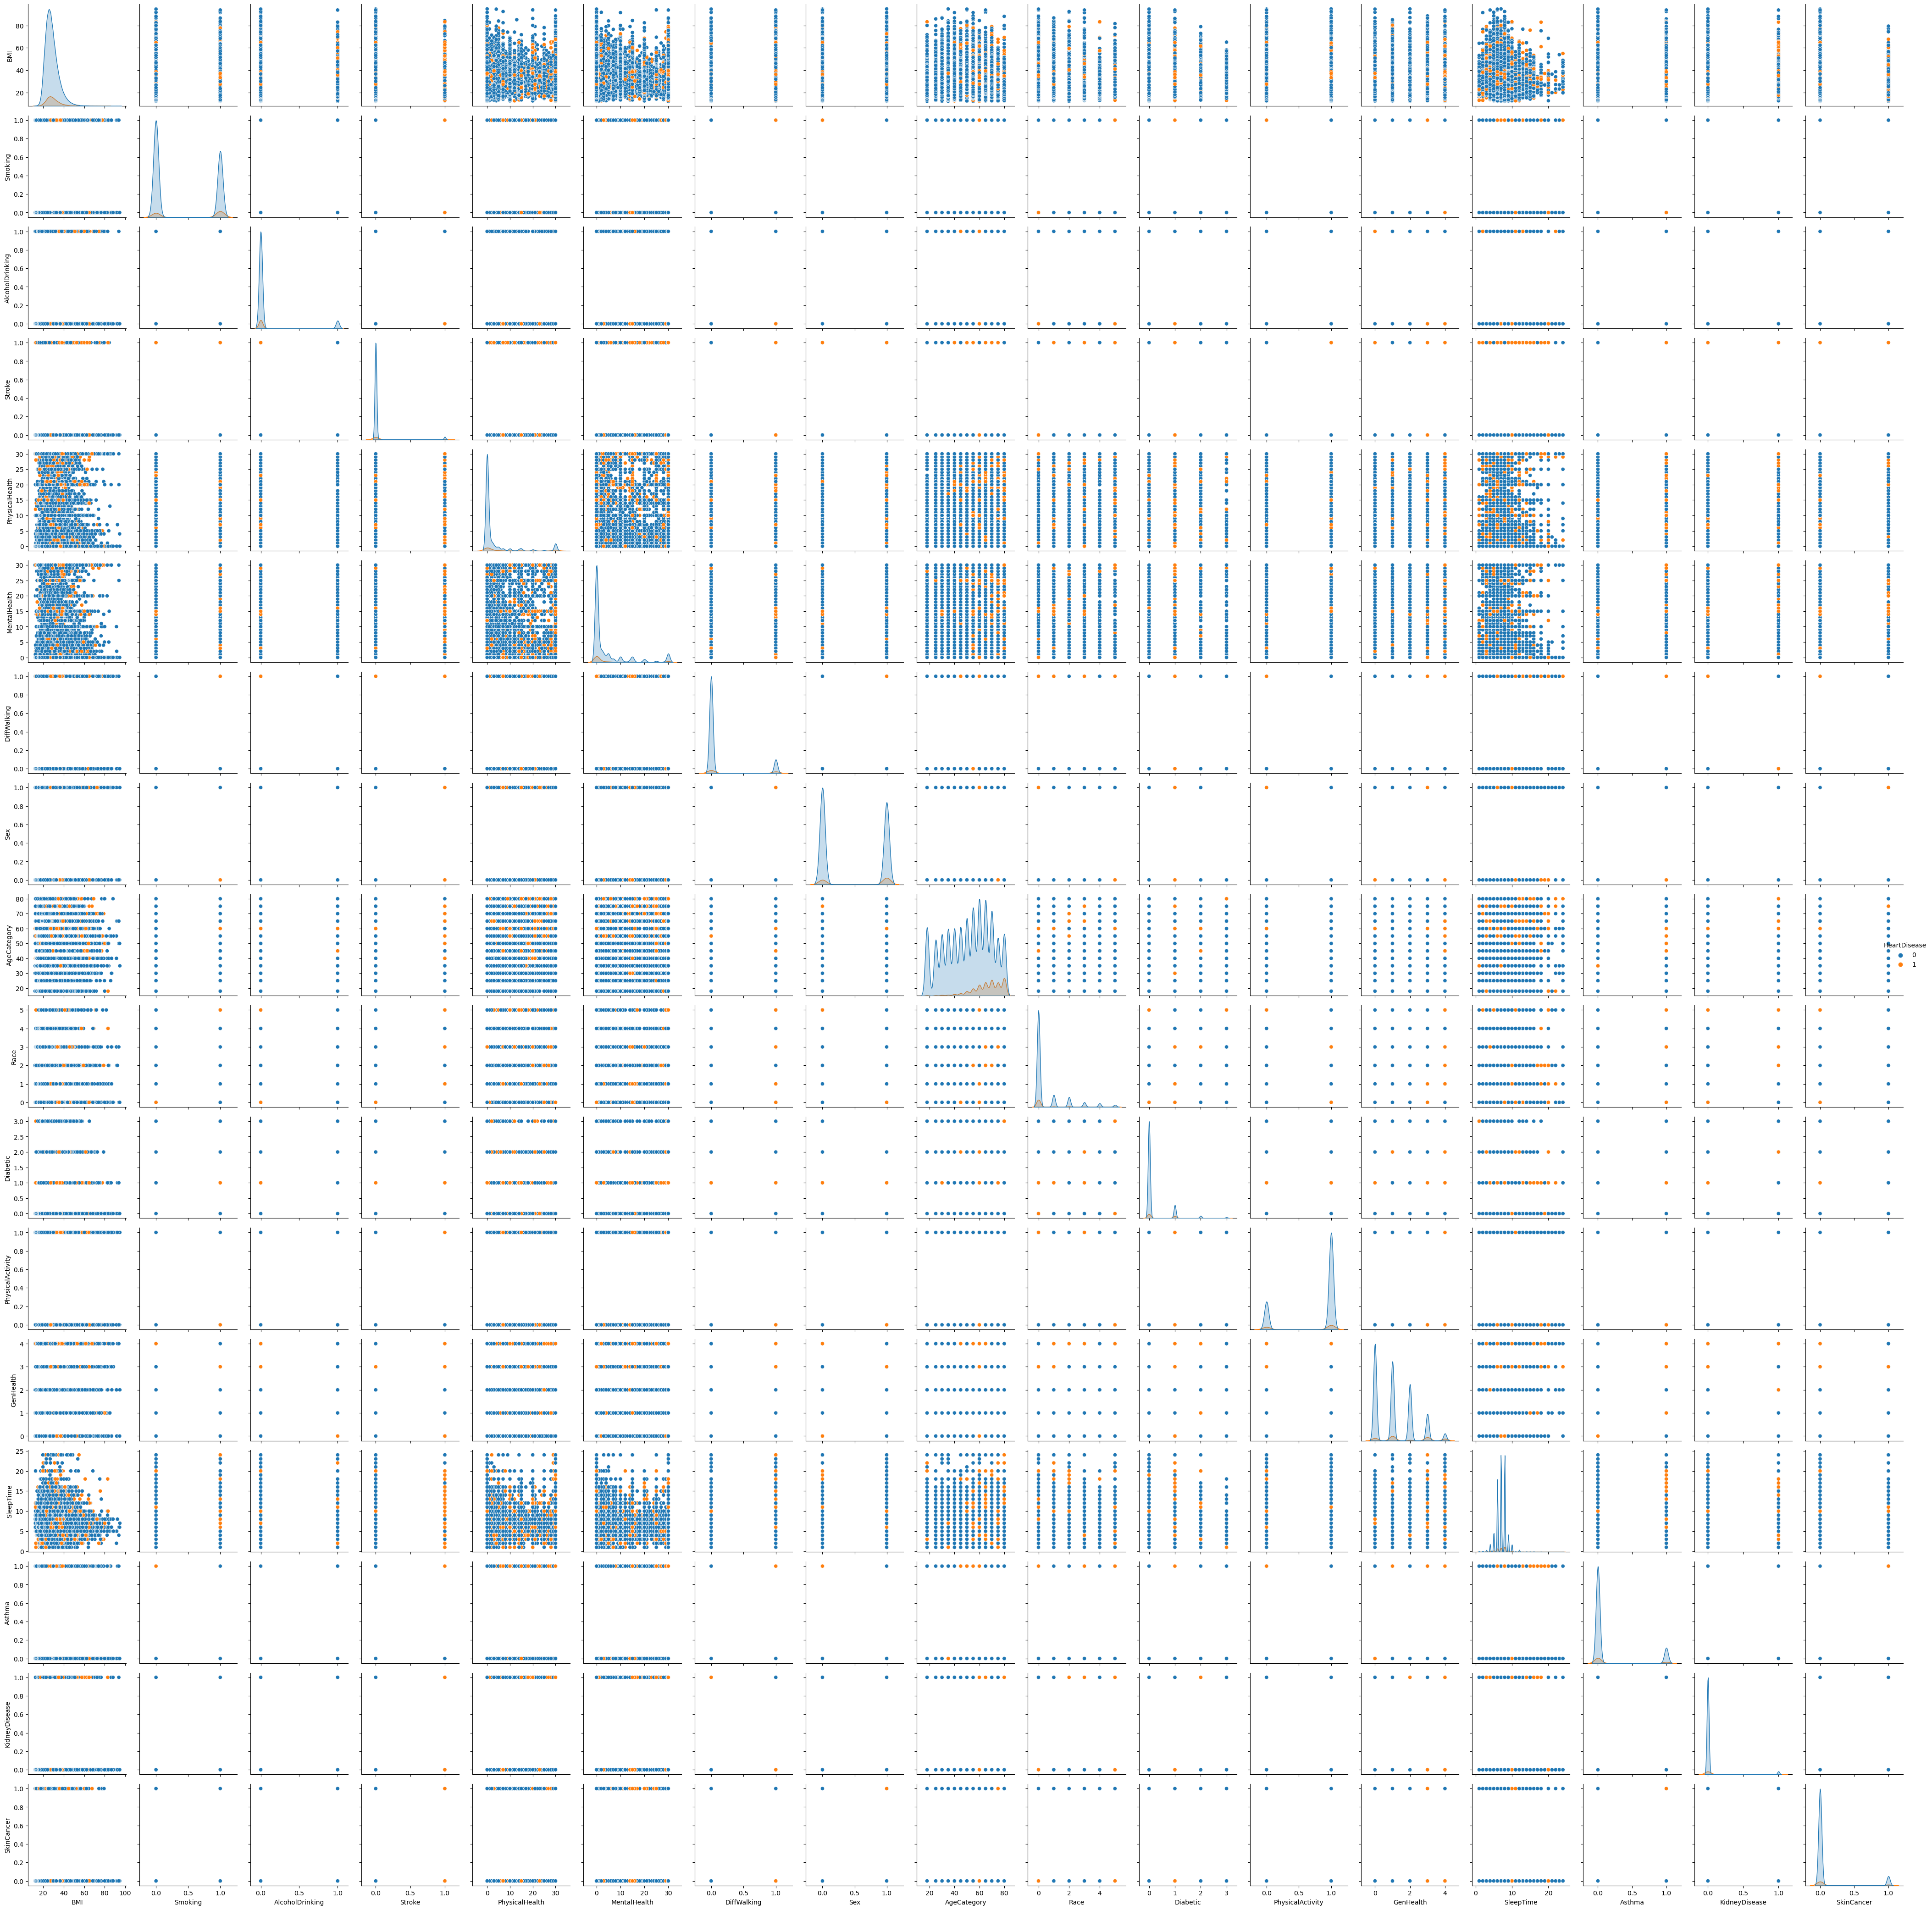

In [16]:
sns.pairplot(heart_for_dup_copy,hue='HeartDisease')
plt.legend('HeartDisease')

# Imbalancing data

The data before SMOTE:

In [ ]:
from functions import create_pie_chart
create_pie_chart(heart_for_dup,'HeartDisease')

Split the data:

In [ ]:
X = heart_for_dup_copy.drop('HeartDisease', axis=1)
y= heart_for_dup_copy['HeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)